<h1>Weather Assignment</h1>


> Georgios Markou, 8180067 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> giorgosmrkou@gmail.com


In this assignment we will analyze data concerning the average temperature and precipitation in athens, for the years 1955-2020.<br> 
To do that we will work with two data files:

- The main one from https://www.ncdc.noaa.gov/cdo-web/search, for the years 1955-2020.
- A supplementary one from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f; for the years 2010-2019.

<h1>Q1: Obtain the Data</h1>

First of all we import the libraries needed to plot and handle the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

- Now we need to read our data. We Download the main data for 1955-2020, from https://www.ncdc.noaa.gov/cdo-web/search. <br>
- We will use the <code>read_csv()</code> to read our data.

In [2]:
weather_athens = pd.read_csv('data/athens_weather_main_data.csv', parse_dates=['DATE'])
weather_athens

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.0,NaN,18.5,10.2
1,GR000016716,1955-01-02,2.0,NaN,14.4,7.0
2,GR000016716,1955-01-03,0.0,NaN,15.8,9.6
3,GR000016716,1955-01-04,0.0,NaN,18.8,7.3
4,GR000016716,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.0,16.6,NaN,NaN
23247,GR000016716,2020-12-28,6.6,14.8,18.2,11.9
23248,GR000016716,2020-12-29,0.0,16.3,19.9,12.5
23249,GR000016716,2020-12-30,0.0,16.4,19.9,14.8



- The <code>'STATION'</code> column does not provide any useful information, because all the data are based on the same station, so we drop it.

In [3]:
weather_athens.STATION.value_counts()

GR000016716    23251
Name: STATION, dtype: int64

In [4]:
weather_athens.drop('STATION', inplace=True , axis=1)
weather_athens

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9
23248,2020-12-29,0.0,16.3,19.9,12.5
23249,2020-12-30,0.0,16.4,19.9,14.8


Now we need to check the completeness of our data. The data can be missing in two ways:
- Date missing all together.
- Value of <code> 'TAVG'</code> or <code>'PRCP'</code> is not registered for a certain date (NaN).<br>

We will first deal with the dates that are missing. We will find dates missing using the data from the supplementary dataset of 2010-2019.



In [5]:
sup_data = pd.read_csv('data/athens_weather_sup_data.csv', parse_dates = [0], header= None)
sup_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


- Reading the documentation we find that column <code>'1'</code> is the average temperature and column <code>'10'</code> is precipitation.<br>
- We drop the columns not needed and give proper names to the columns we keep.

In [6]:
sup_data.drop([2,3,4,5,6,7,8,9,11,12,13],axis=1, inplace=True)
sup_data.rename(columns={0:'DATE',1:'TAVG',10:'PRCP'}, inplace= True)
sup_data

,DATE,TAVG,PRCP
0,2010-01-01,17.9,0.2
1,2010-01-02,15.6,0.0
2,2010-01-03,13.5,0.0
3,2010-01-04,9.5,0.0
4,2010-01-05,13.4,0.0
...,...,...,...
3647,2019-12-27,10.1,0.0
3648,2019-12-28,8.3,7.2
3649,2019-12-29,6.4,3.4
3650,2019-12-30,4.0,12.4


Through trial and error we notice some interesting things about the data in this file:

- The average temperatures have not been parsed as a float but rather as string.
- The non existence of a <code>'TAVG'</code> is depicted as '---'.

In [7]:
sup_data['TAVG'][0]

'17.9'

In [8]:
no_info = sup_data[sup_data['TAVG'] == '---']
no_info

,DATE,TAVG,PRCP
514,2011-05-30,---,11.6
1235,2013-05-20,---,0.0
2012,2015-07-06,---,0.0


To deal with those issues we will:

- Drop the rows containing '---'.
- Parse the <code>'TAVG'</code> from string to float.

In [9]:
to_drop = sup_data[sup_data['TAVG'] == '---'].index
sup_data.drop(to_drop, inplace=True)

In [10]:
sup_data['TAVG'] = sup_data['TAVG'].astype(float)

- We now want to find all the dates that are missing from our main file in the period of 2010-2019.
- We can do that by finding the dates in <code>sup_data.DATE</code> that are not in the <code>weather_athens.DATE</code>.


In [11]:
data_needed = sup_data.loc[~sup_data.DATE.isin(weather_athens.DATE)]
data_needed

,DATE,TAVG,PRCP
876,2012-05-26,21.6,0.0
877,2012-05-27,21.0,0.6
878,2012-05-28,21.7,0.0
881,2012-05-31,21.2,0.0
882,2012-06-01,22.4,0.0
...,...,...,...
2831,2017-10-02,18.7,0.0
2837,2017-10-08,17.8,0.0
2844,2017-10-15,20.4,0.0
2856,2017-10-27,17.8,0.0


- We will then add the new information to our main data set ( <code>weather_athens</code> ).

In [12]:
weather_athens = weather_athens.append(data_needed)
weather_athens.sort_values('DATE', inplace= True)
weather_athens

C:\Users\Markou\AppData\Local\Temp\ipykernel_21592\3866437507.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_athens = weather_athens.append(data_needed)


,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9
23248,2020-12-29,0.0,16.3,19.9,12.5
23249,2020-12-30,0.0,16.4,19.9,14.8


- We will now deal with the NaN values.
- First we check to see what data from <code>'TAVG'</code> and <code>'PRCP'</code> are missing for the years 2010-2019.

In [13]:
weather_athens[['TAVG','PRCP']].loc[(weather_athens.DATE > pd.to_datetime('2010-1-1')) & (weather_athens.DATE < pd.to_datetime('2019-12-31'))].isna().sum()

TAVG      0
PRCP    101
dtype: int64

- Only precipitation values are missing for the period of 2010-2019.
- To help us fill the NaN values, we use <code>sup_data.DATE</code>, <code>weather_athens.DATE</code> as indexes of the dataframes.

In [14]:
weather_athens.set_index('DATE', inplace=True)
weather_athens

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1955-01-01,0.0,NaN,18.5,10.2
1955-01-02,2.0,NaN,14.4,7.0
1955-01-03,0.0,NaN,15.8,9.6
1955-01-04,0.0,NaN,18.8,7.3
1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...
2020-12-27,0.0,16.6,NaN,NaN
2020-12-28,6.6,14.8,18.2,11.9
2020-12-29,0.0,16.3,19.9,12.5


In [15]:
sup_data.set_index('DATE', inplace=True)
sup_data

,TAVG,PRCP
DATE,,
2010-01-01,17.9,0.2
2010-01-02,15.6,0.0
2010-01-03,13.5,0.0
2010-01-04,9.5,0.0
2010-01-05,13.4,0.0
...,...,...
2019-12-27,10.1,0.0
2019-12-28,8.3,7.2
2019-12-29,6.4,3.4


- Then we fill the NaN values with the precipitation values of the supplementary data set, following the index (Date).

In [16]:
weather_athens.PRCP.fillna(sup_data.PRCP, inplace=True)

- We reset the index and count again, how many precipitation values are missing.

In [17]:
weather_athens.reset_index(inplace=True)
weather_athens['PRCP'].loc[(weather_athens.DATE > pd.to_datetime('2010-1-1')) & (weather_athens.DATE < pd.to_datetime('2019-12-31'))].isna().sum()

0

- The last remaining thing to do is deal with the missing values outside the 2010-2019 period.
- For the precipitation we cannot do something.
- For the average temperature we can estimate it, given the min and max temperature values of a given day.

In [18]:
weather_athens.TAVG.fillna((weather_athens.TMAX + weather_athens.TMIN)/2, inplace= True)
weather_athens

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,14.35,18.5,10.2
1,1955-01-02,2.0,10.70,14.4,7.0
2,1955-01-03,0.0,12.70,15.8,9.6
3,1955-01-04,0.0,13.05,18.8,7.3
4,1955-01-05,0.0,13.15,17.9,8.4
...,...,...,...,...,...
24098,2020-12-27,0.0,16.60,NaN,NaN
24099,2020-12-28,6.6,14.80,18.2,11.9
24100,2020-12-29,0.0,16.30,19.9,12.5
24101,2020-12-30,0.0,16.40,19.9,14.8


- We have no further use for the min and max temperature columns, so we drop them.

In [19]:
weather_athens.drop(['TMAX','TMIN'], axis = 1, inplace= True)

- The end result is a dataframe containing as much information possible, given the two data files.

In [20]:
weather_athens

,DATE,PRCP,TAVG
0,1955-01-01,0.0,14.35
1,1955-01-02,2.0,10.70
2,1955-01-03,0.0,12.70
3,1955-01-04,0.0,13.05
4,1955-01-05,0.0,13.15
...,...,...,...
24098,2020-12-27,0.0,16.60
24099,2020-12-28,6.6,14.80
24100,2020-12-29,0.0,16.30
24101,2020-12-30,0.0,16.40


<h1>Q2: Deviation of Summer Temperatures</h1>

Having created our dataframe, we want to make a plot for the Deviation of Summer Temperatures, compared to a baseline of 1974-1999.


- We consider June, July and August as summer.
- We add columns that correspond to the year and month of the row in order to easily manipulate our data.

In [21]:
weather_athens['MONTH'] = pd.DatetimeIndex(weather_athens.DATE).month
weather_athens['YEAR'] = pd.DatetimeIndex(weather_athens.DATE).year
weather_athens

,DATE,PRCP,TAVG,MONTH,YEAR
0,1955-01-01,0.0,14.35,1,1955
1,1955-01-02,2.0,10.70,1,1955
2,1955-01-03,0.0,12.70,1,1955
3,1955-01-04,0.0,13.05,1,1955
4,1955-01-05,0.0,13.15,1,1955
...,...,...,...,...,...
24098,2020-12-27,0.0,16.60,12,2020
24099,2020-12-28,6.6,14.80,12,2020
24100,2020-12-29,0.0,16.30,12,2020
24101,2020-12-30,0.0,16.40,12,2020


- We select the data concerning the summer of each year. 
- We will use this dataframe for this analysis.

In [22]:
summer_weather_athens = weather_athens[(weather_athens.MONTH == 6) | (weather_athens.MONTH == 7) | (weather_athens.MONTH == 8)]
summer_weather_athens

,DATE,PRCP,TAVG,MONTH,YEAR
151,1955-06-01,0.0,21.8,6,1955
152,1955-06-02,0.0,21.7,6,1955
153,1955-06-03,0.0,21.5,6,1955
154,1955-06-04,0.0,22.7,6,1955
155,1955-06-05,0.0,22.5,6,1955
...,...,...,...,...,...
23976,2020-08-27,0.0,28.3,8,2020
23977,2020-08-28,0.0,29.5,8,2020
23978,2020-08-29,0.0,29.3,8,2020
23979,2020-08-30,0.0,27.8,8,2020


- We first calculate the baseline mean.
- The baseline mean will consist of the average summer temperature from 1974-1999.

In [23]:
summer_baseline_mean = summer_weather_athens[(summer_weather_athens.YEAR >= 1974) & (summer_weather_athens.YEAR <= 1999)].TAVG.mean()
summer_baseline_mean

26.230727424749166

- We then calculate the average summer temperature of each year.

In [24]:
summer_means = summer_weather_athens.groupby(summer_weather_athens.YEAR).TAVG.mean()
summer_means

YEAR
1955    25.951087
1956    27.143478
1957    27.371739
1958    27.081522
1959    26.401087
          ...    
2016    28.154348
2017    28.088043
2018    27.436957
2019    28.034783
2020    27.380435
Name: TAVG, Length: 66, dtype: float64

- We also calculate the deviation of the summer temperature means from the baseline mean.

In [25]:
summer_mean_deviation = summer_means - summer_baseline_mean
summer_mean_deviation

YEAR
1955   -0.279640
1956    0.912751
1957    1.141012
1958    0.850794
1959    0.170360
          ...   
2016    1.923620
2017    1.857316
2018    1.206229
2019    1.804055
2020    1.149707
Name: TAVG, Length: 66, dtype: float64

- Lastly we calculate the deviation across the years, smoothed by a 10 year rolling average.

In [26]:
summer_mean_deviation_rolling_average = summer_mean_deviation.rolling(10, min_periods=1).mean()
summer_mean_deviation_rolling_average

YEAR
1955   -0.279640
1956    0.316555
1957    0.591374
1958    0.656229
1959    0.559055
          ...   
2016    1.955320
2017    1.937751
2018    1.864599
2019    1.929381
2020    1.871229
Name: TAVG, Length: 66, dtype: float64

<h3>Now we plot:</h3>

- The average summer temperature mean deviation from a baseline of 1974-1999.
- The Deviation across the years, smoothed by a 10 year rolling average.

Text(0.5, 0, '')

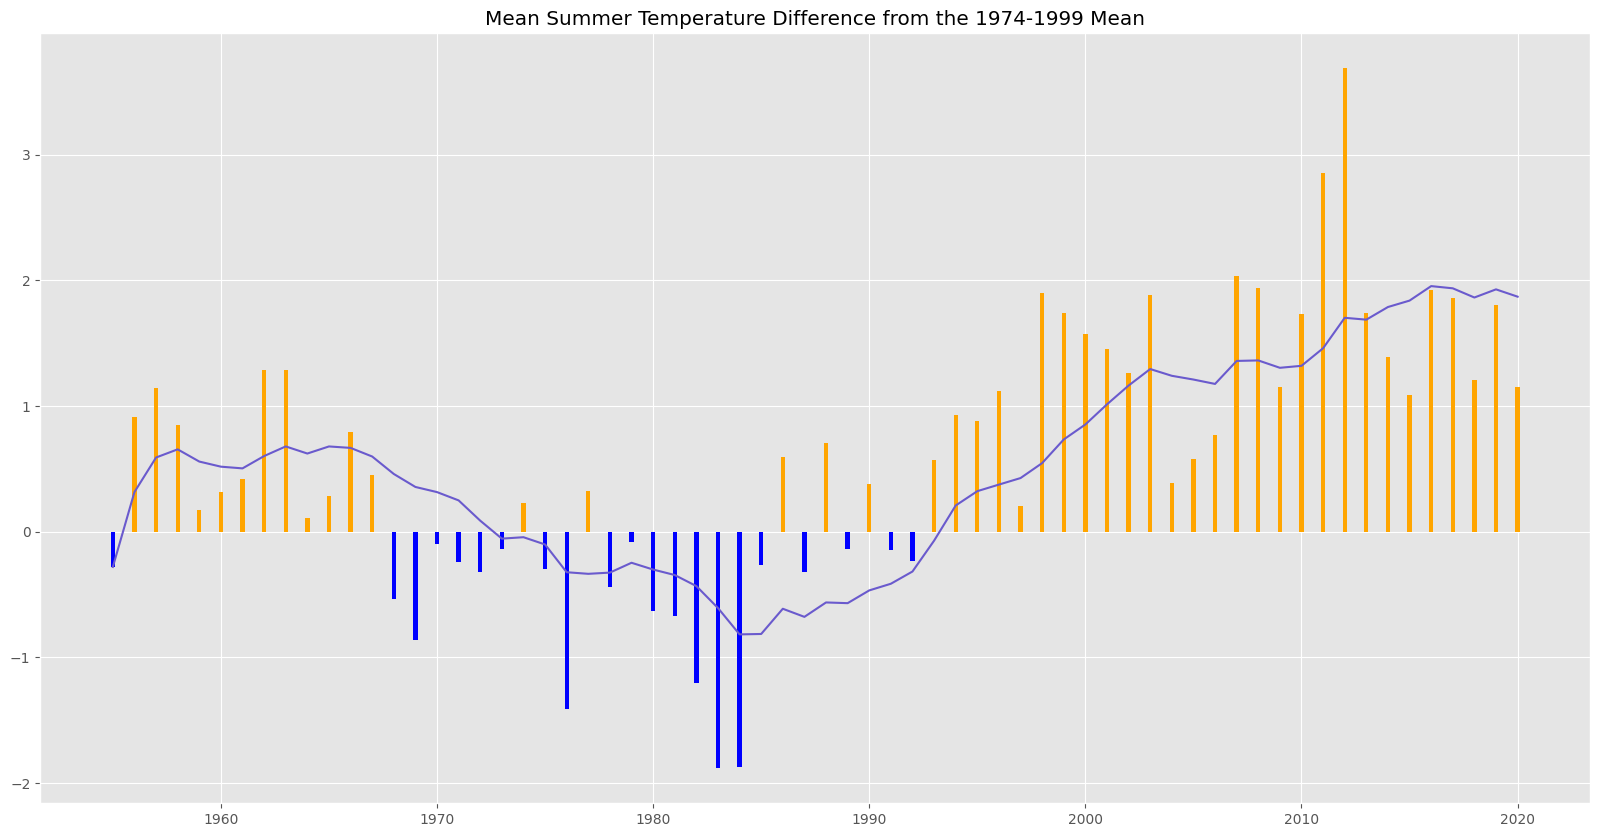

In [27]:
cc = list(map(lambda x: 'blue' if x <= 0 else 'orange', summer_mean_deviation))
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
plt.title('Mean Summer Temperature Difference from the 1974-1999 Mean')
ax = plt.bar(summer_mean_deviation.index, summer_mean_deviation.values, width=0.2, color=cc)
pd.Series(summer_mean_deviation_rolling_average.values, summer_mean_deviation_rolling_average.index).plot(figsize=(20, 10), color='slateblue')
plt.xlabel('') 

<h2>Interpretation</h2>

In this plot we can see a steady increase in the summer average temperature for the years 2000 - 2020 compared to the mean temperatures baseline of 1974-1999. This steady increase in summer temperatures over the years, is really taking off, reaching almost a 2 degree deviation in the last few years. In conclusion, the plot suggests that global warming is rapidly getting worse.

<h1>Q3: Evolution of Daily Temperatures</h1>

Now we want to depict the average temperature throughout the year, for each year. In order to do that:

- We want our data to be indexed by the day and month of the year.
- This way each column will represent one full year of average daily temperatures.
- To achieve that we first create a column that contains day and month, without the year. 

In [28]:
weather_athens['DAY/MONTH'] = weather_athens['DATE'].dt.strftime('%m-%d')
weather_athens

,DATE,PRCP,TAVG,MONTH,YEAR,DAY/MONTH
0,1955-01-01,0.0,14.35,1,1955,01-01
1,1955-01-02,2.0,10.70,1,1955,01-02
2,1955-01-03,0.0,12.70,1,1955,01-03
3,1955-01-04,0.0,13.05,1,1955,01-04
4,1955-01-05,0.0,13.15,1,1955,01-05
...,...,...,...,...,...,...
24098,2020-12-27,0.0,16.60,12,2020,12-27
24099,2020-12-28,6.6,14.80,12,2020,12-28
24100,2020-12-29,0.0,16.30,12,2020,12-29
24101,2020-12-30,0.0,16.40,12,2020,12-30


- Then we create a pivot table with <code>index:day/month</code>, <code>column:year</code> and <code>values:TAVG</code>.

In [29]:
each_year_based_on_day = weather_athens.pivot_table(index='DAY/MONTH',columns='YEAR',values='TAVG')
each_year_based_on_day

YEAR,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DAY/MONTH,,,,,,,,,,,,,,,,,,,,,
01-01,14.35,16.35,9.8,12.1,10.90,8.90,12.0,12.9,15.1,9.2,...,9.9,10.2,11.3,9.8,4.4,3.8,6.0,11.3,8.3,8.4
01-02,10.70,14.50,10.3,11.8,12.45,8.20,12.2,13.7,13.9,9.3,...,11.5,9.5,10.9,11.3,4.5,7.9,8.4,13.7,7.4,7.1
01-03,12.70,12.15,10.4,12.1,13.70,7.50,13.6,16.8,13.2,7.6,...,11.0,9.7,11.6,11.1,5.5,11.5,11.1,11.5,6.4,8.9
01-04,13.05,11.65,8.1,10.3,15.50,10.20,13.8,11.7,16.4,10.4,...,9.8,11.3,11.2,10.8,11.1,13.4,11.8,9.6,5.7,10.4
01-05,13.15,8.60,8.9,8.5,12.55,8.95,15.3,8.8,15.0,8.7,...,9.3,11.1,11.3,11.8,6.2,17.2,13.2,10.4,3.9,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,10.20,11.20,10.2,13.6,11.80,15.85,13.9,15.9,10.6,14.0,...,8.9,13.2,13.9,11.3,12.4,10.8,12.9,6.9,9.8,16.6
12-28,8.55,8.30,9.8,12.4,13.55,15.30,16.4,14.3,12.4,12.1,...,9.4,13.3,13.3,11.9,11.8,7.2,14.3,8.8,8.6,14.8
12-29,8.90,9.00,11.9,13.5,13.60,12.75,17.5,13.3,8.8,11.8,...,8.6,12.1,13.0,14.2,12.4,3.9,12.7,10.8,5.9,16.3


- Lastly we smooth the daily averages by a 30 year rolling average.

In [30]:
rolling_each_year = each_year_based_on_day.rolling(30,min_periods=1).mean()
rolling_each_year

YEAR,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DAY/MONTH,,,,,,,,,,,,,,,,,,,,,
01-01,14.350000,16.350000,9.800000,12.100000,10.900000,8.900000,12.000000,12.900000,15.100000,9.200000,...,9.900000,10.200000,11.300000,9.800000,4.400000,3.800000,6.000000,11.300000,8.300000,8.400000
01-02,12.525000,15.425000,10.050000,11.950000,11.675000,8.550000,12.100000,13.300000,14.500000,9.250000,...,10.700000,9.850000,11.100000,10.550000,4.450000,5.850000,7.200000,12.500000,7.850000,7.750000
01-03,12.583333,14.333333,10.166667,12.000000,12.350000,8.200000,12.600000,14.466667,14.066667,8.700000,...,10.800000,9.800000,11.266667,10.733333,4.800000,7.733333,8.500000,12.166667,7.366667,8.133333
01-04,12.700000,13.662500,9.650000,11.575000,13.137500,8.700000,12.900000,13.775000,14.650000,9.125000,...,10.550000,10.175000,11.250000,10.750000,6.375000,9.150000,9.325000,11.525000,6.950000,8.700000
01-05,12.790000,12.650000,9.500000,10.960000,13.020000,8.750000,13.380000,12.780000,14.720000,9.040000,...,10.300000,10.360000,11.260000,10.960000,6.340000,10.760000,10.100000,11.300000,6.340000,8.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,13.055000,12.128333,10.690000,12.976667,13.545000,15.588333,12.796667,11.580000,14.133333,13.536667,...,13.013333,12.320000,10.783333,14.033333,11.906667,9.983333,12.630000,10.970000,13.910000,14.086667
12-28,13.051667,11.880000,10.636667,12.983333,13.555000,15.565000,12.766667,11.543333,13.956667,13.476667,...,12.966667,12.180000,10.853333,13.990000,11.803333,9.723333,12.676667,10.710000,13.613333,14.153333
12-29,13.055000,11.593333,10.626667,13.086667,13.528333,15.440000,12.770000,11.413333,13.733333,13.276667,...,12.793333,11.943333,10.910000,13.900000,11.703333,9.466667,12.693333,10.733333,13.160000,14.153333


We continue by calculating the daily average temperature mean from the baseline 1974-1999. We:

- Locate the data for the baseline years.
- Group them by Day/Month.
- Calculate the mean of the the average daily temperatures.

In [31]:
baseline = weather_athens.loc[(weather_athens.YEAR >= 1974) & (weather_athens.YEAR <= 1999)] 
baseline_mean = baseline.groupby('DAY/MONTH').TAVG.mean()
baseline_mean

DAY/MONTH
01-01    10.365385
01-02    10.707692
01-03    10.207692
01-04     9.634615
01-05     9.919231
           ...    
12-27     9.769231
12-28    10.207692
12-29    10.776923
12-30    11.353846
12-31    11.007692
Name: TAVG, Length: 366, dtype: float64

- We finish by applying a 30 years rolling average

In [32]:
baseline_mean_rolling = baseline_mean.rolling(30,min_periods=1).mean()
baseline_mean_rolling

DAY/MONTH
01-01    10.365385
01-02    10.536538
01-03    10.426923
01-04    10.228846
01-05    10.166923
           ...    
12-27    11.620641
12-28    11.527436
12-29    11.451282
12-30    11.410000
12-31    11.365000
Name: TAVG, Length: 366, dtype: float64

Having all the elements made we start to plot. In this plot:
- We plot each years complete daily average temperatures, throughout the years.
- The darker the sade of orange, the more recent the year is.
- The black series is the baseline mean, with rolling average applied.
- We reset the index to easily convert dates to named months.

In [33]:
rolling_each_year.reset_index(inplace=True)

Text(0, 0.5, 'average Daily Temperature')

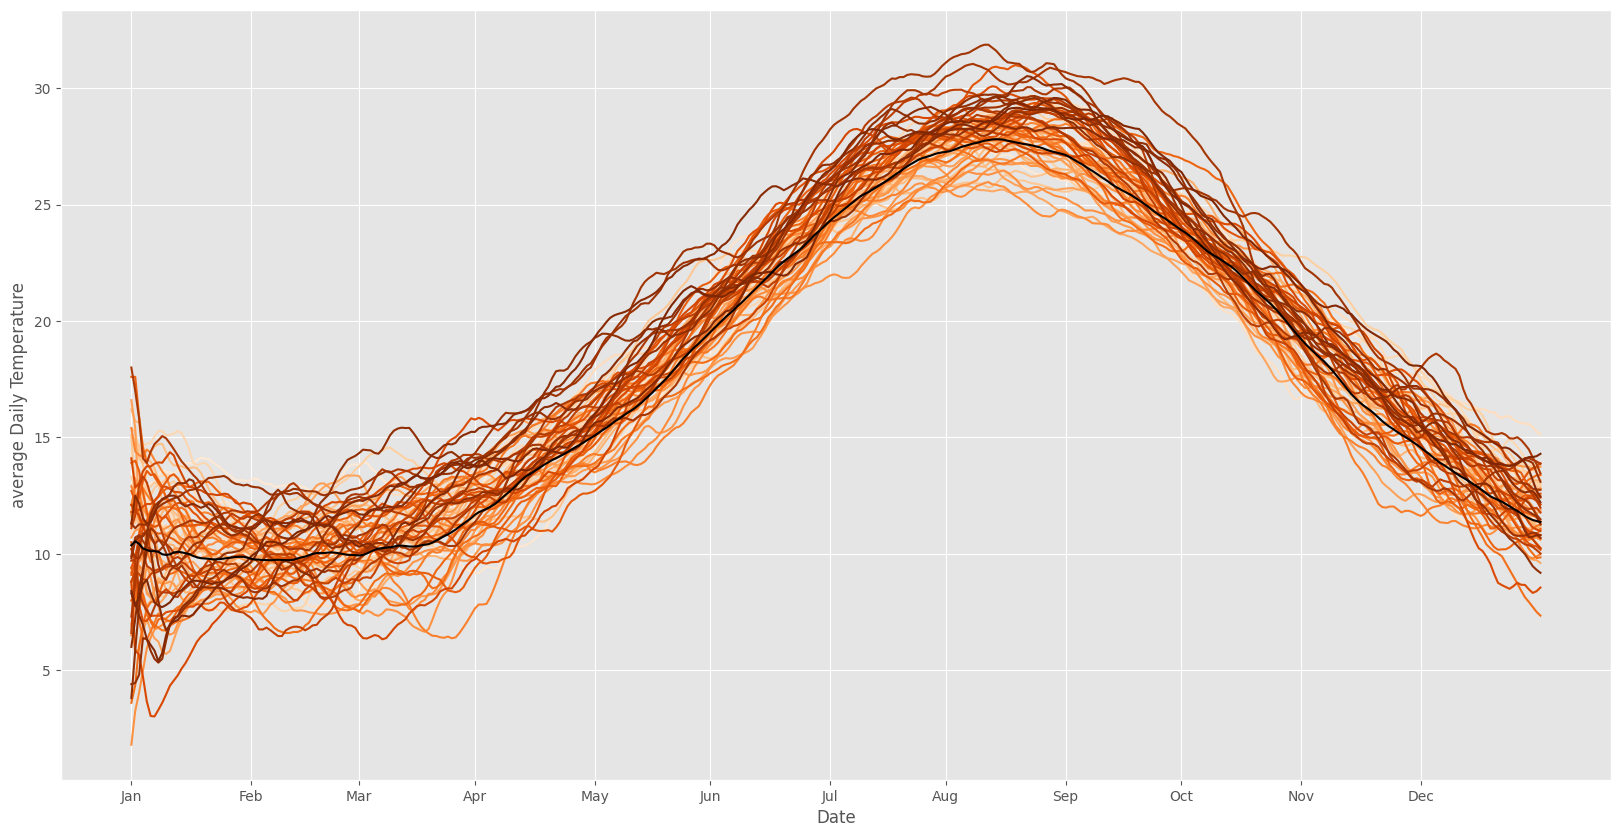

In [34]:
colors = plt.cm.Oranges(np.linspace(.1, 1, 66))
ax = rolling_each_year.plot(figsize=(12, 10), color= colors)
plt.xticks = 12
ax.set_xticks([0,31,59,89,120,150,181,211,242,272,303,334])#DAY
ax.get_legend().remove()
pd.Series(baseline_mean_rolling.values, baseline_mean_rolling.index).plot(figsize=(20, 10), color='black')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Date')
ax.set_ylabel('average Daily Temperature')

<h2> Interpretation </h2>

In this diagram we can also notice that the daily temperatures of the latest years, that are depicted with darker shades of orange, are rising. That is especially true for the summer days, where we can clearly see a big difference between the baseline temperature, and the temperature in recent years. This once again suggests that global warming exists, and that its rapidly getting worse.

<H1>Q4: Extreme Temperature Events<H1>

Here we want to count the number of extreme events, compared to a baseline of 1974-1999.<br><br>
To count an extreme event, we need to measure the mean temperature for each day across the baseline years. Then we will compare it with all the days of the year. If the average temperature is exceeding the temperature baseline mean by 10% we consider it an extreme event.<br><br>
Lastly we will divide by the total number of days in the given year. To do that we need:

- Baseline average daily temperature mean, for each day of the month, to which we will compare the daily average temperatures throughout the year.
- Number of days in each year, for which we have information about.

We create a pivot table with <code>index:year</code>, <code>column:day/month</code> and <code>values:TAVG</code>, in order to have information for each day, based on year.

In [35]:
each_day_based_on_year = weather_athens.pivot_table(index='YEAR',columns='DAY/MONTH',values='TAVG')
each_day_based_on_year

DAY/MONTH,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
YEAR,,,,,,,,,,,,,,,,,,,,,
1955,14.35,10.70,12.70,13.05,13.15,14.25,13.30,15.80,14.7,13.2,...,14.1,14.85,14.25,12.0,11.60,10.2,8.55,8.9,9.25,13.80
1956,16.35,14.50,12.15,11.65,8.60,7.15,9.15,10.35,10.3,8.7,...,11.0,9.80,14.30,12.4,10.30,11.2,8.30,9.0,9.15,8.15
1957,9.80,10.30,10.40,8.10,8.90,8.55,9.65,8.60,7.4,9.5,...,9.6,8.90,9.90,9.3,10.20,10.2,9.80,11.9,15.70,15.80
1958,12.10,11.80,12.10,10.30,8.50,10.20,13.60,15.60,7.8,5.8,...,15.8,16.80,16.40,15.3,12.90,13.6,12.40,13.5,11.20,9.00
1959,10.90,12.45,13.70,15.50,12.55,8.20,7.15,9.40,13.5,12.5,...,9.9,12.30,11.85,13.0,12.15,11.8,13.55,13.6,10.50,10.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3.80,7.90,11.50,13.40,17.20,16.40,14.10,13.40,13.2,13.2,...,6.8,7.90,9.20,9.1,11.20,10.8,7.20,3.9,3.60,3.40
2017,6.00,8.40,11.10,11.80,13.20,10.60,2.30,0.50,0.8,2.5,...,5.8,6.50,7.90,10.6,11.30,12.9,14.30,12.7,11.30,9.70
2018,11.30,13.70,11.50,9.60,10.40,11.60,13.90,15.20,14.0,13.2,...,12.2,13.50,12.50,9.6,6.00,6.9,8.80,10.8,10.60,9.70


- Then we count the number of days in each year, for which we have information about.

In [36]:
days_of_the_year = each_day_based_on_year.count(axis=1)
days_of_the_year

YEAR
1955    365
1956    366
1957    364
1958    365
1959    365
       ... 
2016    366
2017    365
2018    365
2019    365
2020    366
Length: 66, dtype: int64

- The baseline mean of daily average temperatures was already calculated previously.

In [37]:
baseline_mean

DAY/MONTH
01-01    10.365385
01-02    10.707692
01-03    10.207692
01-04     9.634615
01-05     9.919231
           ...    
12-27     9.769231
12-28    10.207692
12-29    10.776923
12-30    11.353846
12-31    11.007692
Name: TAVG, Length: 366, dtype: float64

- Now we count the days with extreme conditions, as they were defined previously.
- We use <code> axis=1 </code>to count the days for each year (<code>row</code>) that were extreme. 

In [38]:
extreme_events = each_day_based_on_year[(each_day_based_on_year-baseline_mean)/baseline_mean > 0.1].count(axis=1)
extreme_events

YEAR
1955    128
1956    113
1957    116
1958    130
1959     96
       ... 
2016    159
2017    170
2018    173
2019    163
2020    168
Length: 66, dtype: int64

- Lastly we divide by the number of days, to get the percentage of extreme events per year.

In [39]:
extreme_events_per = extreme_events/days_of_the_year
extreme_events_per

YEAR
1955    0.350685
1956    0.308743
1957    0.318681
1958    0.356164
1959    0.263014
          ...   
2016    0.434426
2017    0.465753
2018    0.473973
2019    0.446575
2020    0.459016
Length: 66, dtype: float64

- Finally we measure the mean extreme events of the baseline years.

In [40]:
extreme_temp_baseline_mean = extreme_events_per.loc[1974:1999].mean()
extreme_temp_baseline_mean

0.24834654827917796

In this plot we depict every years extreme events percentage:
- The orange years are the ones that exceed the baseline mean while the blue ones do not.
- The grey line is the baseline mean of extreme events.

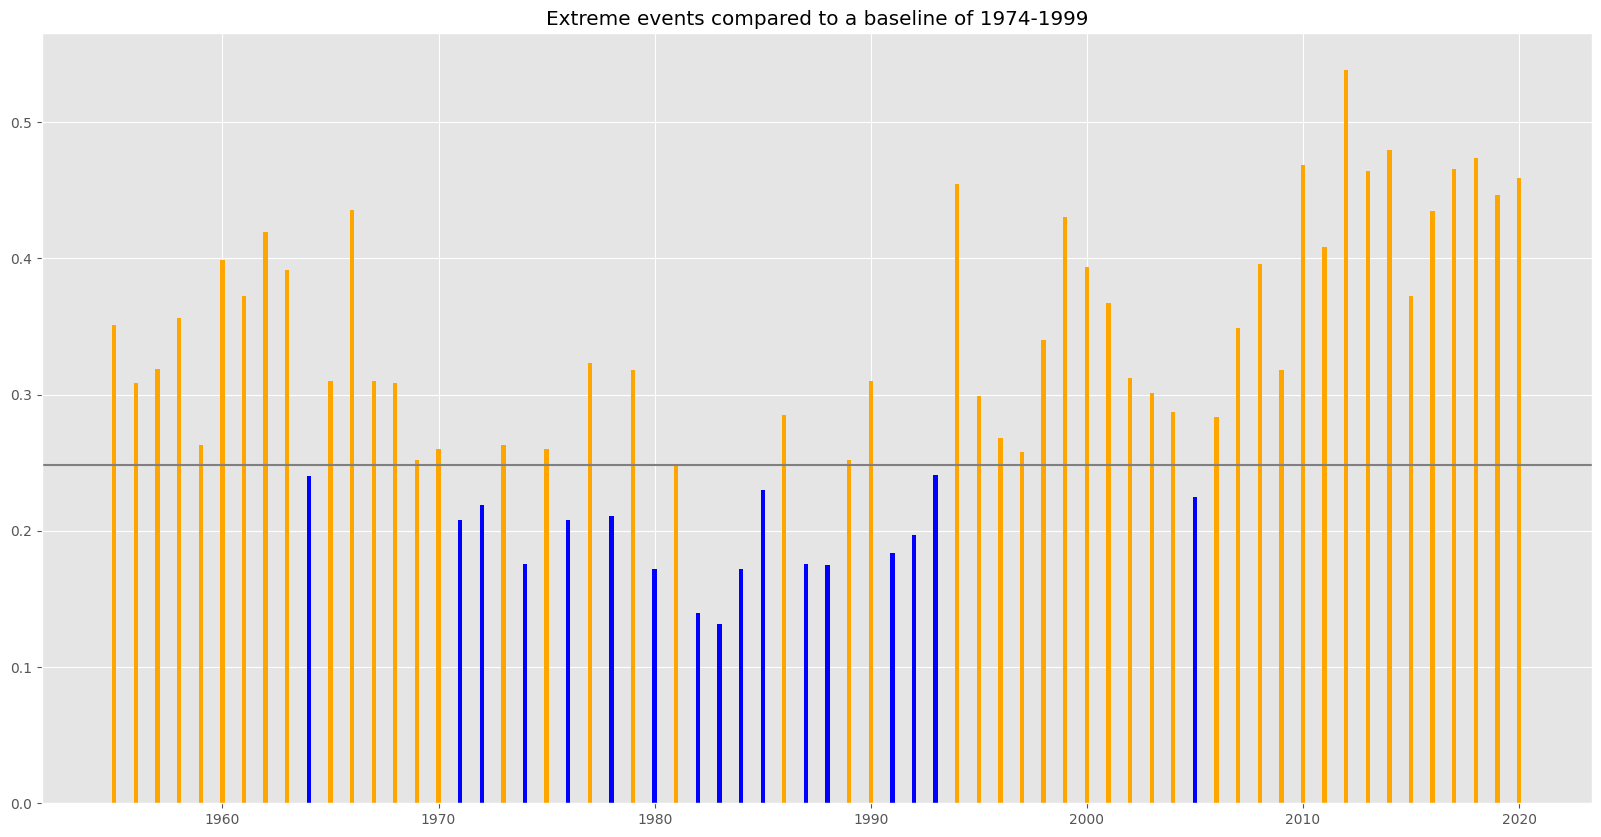

In [41]:
cc = list(map(lambda x: 'blue' if x <= extreme_temp_baseline_mean else 'orange', extreme_events_per))
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.xlabel('')
plt.title('Extreme events compared to a baseline of 1974-1999')
ax = plt.bar(extreme_events_per.index,extreme_events_per.values, width = 0.2, color=cc)
plt.axhline(y = extreme_temp_baseline_mean,color='grey' )


<h2>Interpretation</h2>

We can see a rise in extreme events in a consistent basis after 1994. In recent years, temperatures exceeding the expected value have rose from 28% to almost 40%. Following the pattern of the previous plots, this also suggests that the weather is getting hotter and more extreme, due to global warming.

<h1>Q5: Precipitation<h1>

Finally we want to see whether precipitation becomes more intense over the years. To do that we need:
- The Overall rainfall over the year
- The number of rainy days for each year

- First we calculate the total precipitation for each year

In [42]:
rainfall_years = weather_athens.groupby(['YEAR']).PRCP.sum()
rainfall_years

YEAR
1955    547.0
1956    281.3
1957    303.2
1958    350.0
1959    214.0
        ...  
2016    261.6
2017    304.3
2018    380.2
2019    570.0
2020    210.4
Name: PRCP, Length: 66, dtype: float64

The we need to count the days that rained each year. To do that we:
- Count the days that did not rain
- Group them by year and count them for each year

In [43]:
rained = weather_athens.loc[weather_athens.PRCP != 0]
rained_each_year = rained.groupby('YEAR').PRCP.count()
rained_each_year

YEAR
1955    68
1956    52
1957    73
1958    68
1959    62
        ..
2016    42
2017    48
2018    55
2019    58
2020    38
Name: PRCP, Length: 66, dtype: int64

- Then we convert this to a ratio

In [44]:
ratio = rainfall_years/rained_each_year
ratio

YEAR
1955    8.044118
1956    5.409615
1957    4.153425
1958    5.147059
1959    3.451613
          ...   
2016    6.228571
2017    6.339583
2018    6.912727
2019    9.827586
2020    5.536842
Name: PRCP, Length: 66, dtype: float64

- We also calculate the rainfall rolling average 

In [45]:
rolling_mean_rainfall = ratio.rolling(10, min_periods=1).mean()

Having all that we can create a plot with:
- With the average intensity of rainfall for each year
- The average intensity of rainfall for each year, smoothed by a 10 years rolling average

<Axes: title={'center': 'Intensity of rainfall from 1955-2020'}, xlabel='YEAR'>

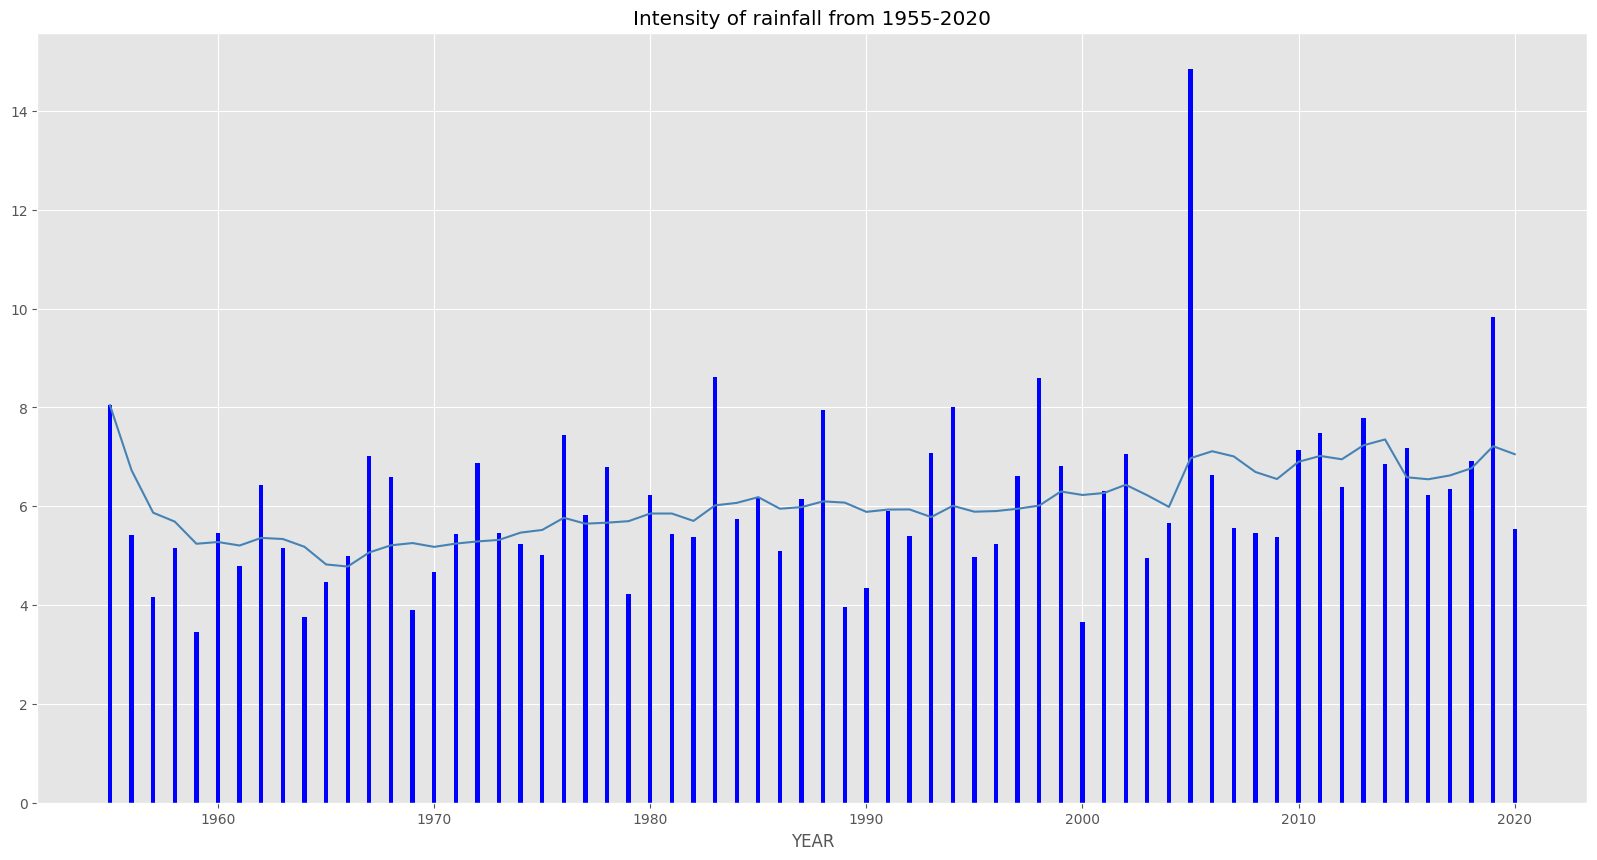

In [46]:
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
plt.xlabel('')
plt.title('Intensity of rainfall from 1955-2020')
ax = plt.bar(ratio.index,ratio.values, width = 0.2, color='blue')
pd.Series(rolling_mean_rainfall.values, rolling_mean_rainfall.index).plot(figsize=(20, 10), color='steelblue')


<h2>Interpretation</h2>

The trend of events getting more intense, continuous and in the precipitation section. From the rolling average mean of the intensity of precipitation, we can see a steady increase in the intensity of the rainfall over the years.

